<a href="https://colab.research.google.com/github/Shimjoonkyo/CNN/blob/main/CNN_with_malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 32kB/s 
     |████████████████████████████████| 501kB 45.8MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 4.3MB 44.2MB/s 


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 45.30 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [5]:
img_width=64
img_height=64

In [8]:
datagen=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)
train_data_generator=datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                 target_size=(img_width,img_height),class_mode='binary',batch_size=16,
                                                subset='training')

Found 22048 images belonging to 2 classes.


In [9]:
validation_data_generator=datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                 target_size=(img_width,img_height),class_mode='binary',batch_size=16,
                                                subset='validation')

Found 5510 images belonging to 2 classes.


In [19]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
hist=model.fit_generator(generator=train_data_generator,steps_per_epoch=len(train_data_generator),
                        epochs=5,validation_data=validation_data_generator,
                        validation_steps=len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 165s 119ms/step - loss: 0.4896 - accuracy: 0.7653 - val_loss: 0.1997 - val_accuracy: 0.9240
Epoch 2/5
1378/1378 [==============================] - 165s 120ms/step - loss: 0.2261 - accuracy: 0.9229 - val_loss: 0.2523 - val_accuracy: 0.8802
Epoch 3/5
1378/1378 [==============================] - 165s 119ms/step - loss: 0.2063 - accuracy: 0.9300 - val_loss: 0.1862 - val_accuracy: 0.9372
Epoch 4/5
1378/1378 [==============================] - 165s 120ms/step - loss: 0.1899 - accuracy: 0.9417 - val_loss: 0.1806 - val_accuracy: 0.9412
Epoch 5/5
1378/1378 [==============================] - 162s 117ms/step - loss: 0.1776 - accuracy: 0.9453 - val_loss: 0.1735 - val_accuracy: 0.9408


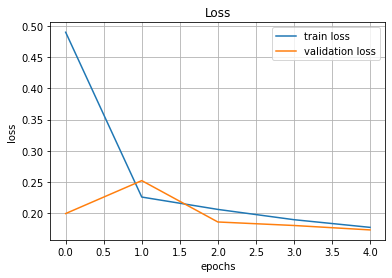

In [15]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

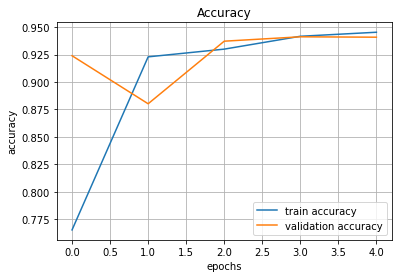

In [16]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()